In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing  all the
# functions defined in functions.py
from utils import functions

In [3]:
X_train, X_test, y_train, y_test = functions.load_data()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly.fit(X_train_poly, y_train)
lin3 = LinearRegression()
lin3.fit(X_train_poly, y_train) 

LinearRegression()

In [5]:
lin3.score(X_train_poly,y_train)

0.5226340490727373

In [88]:
predictions = lin3.predict(X_test_poly)

In [111]:
functions.df_error(predictions,y_test,'error_pol_reg3.csv')

In [113]:
import pickle

# save the model to disk
filename = 'model/model_pol_reg3'
pickle.dump(lin3, open(filename, 'wb'))

In [117]:
#Linear Regression probando Ridge y lasso

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler


lin_reg = LinearRegression()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [118]:
# Modelo 1
lin_reg = LinearRegression()
lin_reg.fit(X_train_scal, y_train)

print(lin_reg.score(X_train_scal, y_train))

y_pred = lin_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.6322283365502522
MAE test 0.7565347280170874
MAPE test 0.05222849022150764
MSE test 2.0947239273403806
RMSE test 1.4473161117531927


In [119]:
# Modelo 2
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train_scal, y_train)

print(ridge_reg.score(X_train_scal, y_train))

y_pred = ridge_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.6315070629693269
MAE test 3.4777370423710585
MAPE test 0.07349640512638399
MSE test 22.59468658157393
RMSE test 4.753386853767946


In [120]:
n_alphas = 100
alphas = np.logspace(-4, 2, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    
    # coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scal)
    ridge_error = mean_absolute_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    # baseline.append(baseline_error)

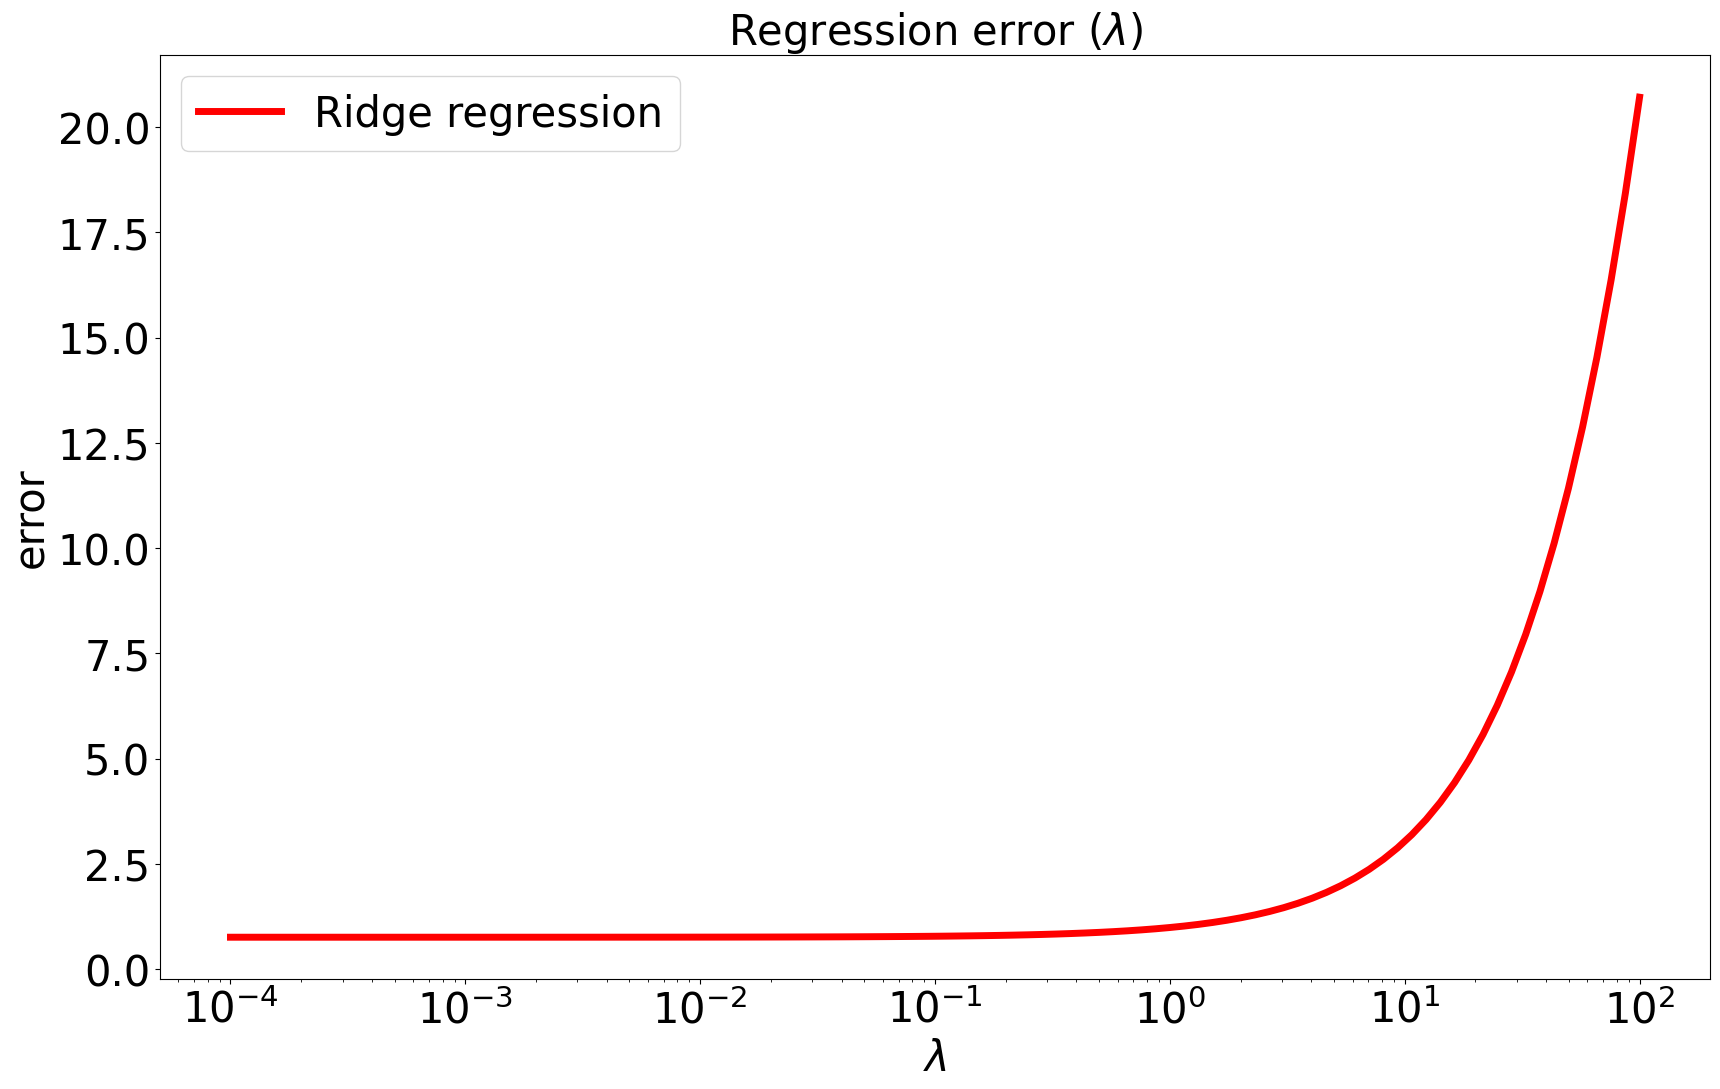

In [121]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
# ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [122]:
# Modelo 3
lasso_reg = Lasso(alpha=200)
lasso_reg.fit(X_train_scal, y_train)

print(lasso_reg.score(X_train_scal, y_train))

y_pred = lasso_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.35821025900301784
MAE test 85.29476172481834
MAPE test 0.7354011039915516
MSE test 19909.746961995246
RMSE test 141.10190275823797


In [123]:
# Modelo 4
elastic = ElasticNet(alpha= 0.01, l1_ratio=0.95)

elastic.fit(X_train_scal, y_train)

print(elastic.score(X_train_scal, y_train))

y_pred = elastic.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.6320561100964488
MAE test 0.8412537036169663
MAPE test 0.052910812719258404
MSE test 2.104088661473679
RMSE test 1.4505477108574123
